# plotly

[plotly](https://plot.ly/python/) became open source - it was not at the beginning -, it proposes a large gallery of javascript graphs. *plotly* also offers to host dashboards built with [plotly](https://plot.ly/python/).

The first script usually returns an exception:

But there exists an [offline](https://plot.ly/python/offline/) mode.

[documentation](https://plot.ly/) [source](https://github.com/plotly/plotly.py) [installation](https://plot.ly/python/getting-started/) [tutorial](http://help.plot.ly/tutorials/) [gallerie](https://plot.ly/python/)

Autres liens : [styles de texte en python](https://plot.ly/python/axes/) ou [styles de text en javascript](https://plot.ly/javascript/text-and-annotations/)

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Enable plotly in a notebook

In [2]:
# import cufflinks  # does not seem to be needed anymore
# import chart_studio.plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Example from the documentation

In [3]:
import plotly.offline as py  # replace plotly.plotly by plotly.offline
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

## pandas and plotly

In [4]:
from sklearn.datasets import load_iris
import pandas
data = load_iris()
df = pandas.DataFrame(data["data"])
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# cufflinks.go_offline()  # to draw within the notebook
# df.iplot() # issue with PlotlyLocalCredentialsError               

## from matplotlib to plotly

In [6]:
%matplotlib inline

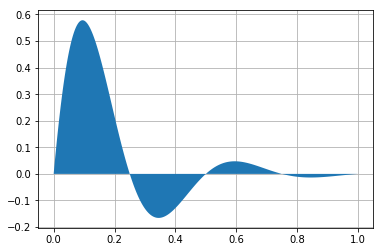

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5);

In [8]:
# convert one figure matplotlib en plotly, not fully working
# from IPython.display import HTML
# print(py.plot_mpl(fig, output_type="div"))